In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
gold_data = pd.read_csv('/content/gold price dataset.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [19]:
# Assuming 'gold_data' is your DataFrame
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features from the datetime objects if needed.
# For example, to get the year:
gold_data['Year'] = gold_data['Date'].dt.year

# Now calculate the correlation
correlation = gold_data.corr()
print(correlation)

             Date       SPX       GLD       USO       SLV   EUR/USD      Year
Date     1.000000  0.944033  0.209118 -0.782230 -0.174108 -0.794540  0.994957
SPX      0.944033  1.000000  0.049345 -0.591573 -0.274055 -0.672017  0.944403
GLD      0.209118  0.049345  1.000000 -0.186360  0.866632 -0.024375  0.206654
USO     -0.782230 -0.591573 -0.186360  1.000000  0.167547  0.829317 -0.775765
SLV     -0.174108 -0.274055  0.866632  0.167547  1.000000  0.321631 -0.172485
EUR/USD -0.794540 -0.672017 -0.024375  0.829317  0.321631  1.000000 -0.791655
Year     0.994957  0.944403  0.206654 -0.775765 -0.172485 -0.791655  1.000000


In [20]:
correlation = gold_data.corr()

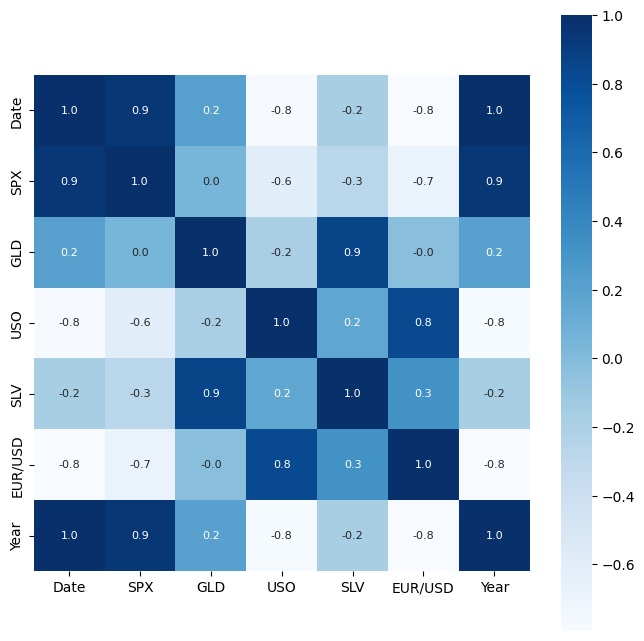

In [23]:
#constructing heat map to understand correlation
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="Blues")
plt.show()

In [22]:
#corr values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Name: GLD, dtype: float64


<ipython-input-26-09c262635c5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

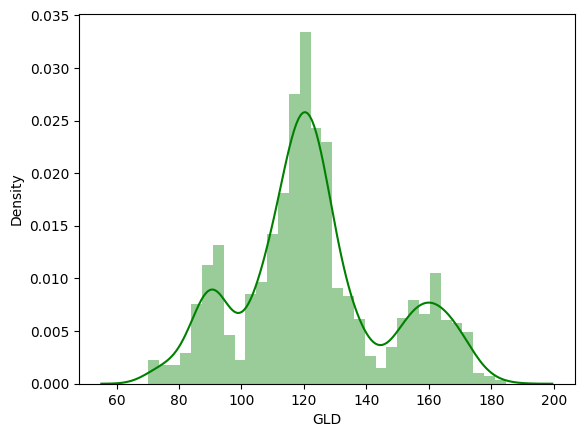

In [26]:
#checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the features and Target

In [25]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [27]:
print(X)

              SPX        USO      SLV   EUR/USD  Year
0     1447.160034  78.470001  15.1800  1.471692  2008
1     1447.160034  78.370003  15.2850  1.474491  2008
2     1411.630005  77.309998  15.1670  1.475492  2008
3     1416.180054  75.500000  15.0530  1.468299  2008
4     1390.189941  76.059998  15.5900  1.557099  2008
...           ...        ...      ...       ...   ...
2285  2671.919922  14.060000  15.5100  1.186789  2018
2286  2697.790039  14.370000  15.5300  1.184722  2018
2287  2723.070068  14.410000  15.7400  1.191753  2018
2288  2730.129883  14.380000  15.5600  1.193118  2018
2289  2725.780029  14.405800  15.4542  1.182033  2018

[2290 rows x 5 columns]


In [28]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [32]:
print(X_train)

              SPX        USO        SLV   EUR/USD  Year
476   1138.500000  39.790001  16.889999  1.361693  2010
1958  2202.939941  10.630000  15.800000  1.063886  2016
248    700.820007  24.480000  12.770000  1.256408  2009
2231  2656.000000  11.890000  15.570000  1.225280  2018
1325  1838.880005  33.040001  19.420000  1.366998  2014
...           ...        ...        ...       ...   ...
1071  1409.150024  32.320000  32.980000  1.287515  2012
433   1132.989990  40.270000  17.230000  1.442398  2010
674   1286.119995  38.610001  27.389999  1.357276  2011
1099  1461.890015  33.919998  29.180000  1.306745  2013
1608  2092.429932  18.500000  15.600000  1.057295  2015

[1832 rows x 5 columns]


Model train : **Random Forest Regressor**

In [29]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluate

In [34]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[168.58979965  82.0958998  116.10260028 127.6293011  120.46170098
 154.77829782 150.21259795 126.33310023 117.40139871 125.96160101
 116.34810101 171.45860092 141.75439827 167.4454979  114.98570034
 117.54020042 139.07780275 170.25180107 159.89650234 157.41099961
 155.15000054 122.94949992 176.47019935 157.14630388 125.16520044
  93.6991997   76.99980032 120.12990019 119.16049983 167.44909931
  88.09580024 125.41720001  91.36000081 117.6387001  121.03159927
 135.73840081 115.48980127 114.46010069 146.63739899 107.58910074
 105.26970293  87.15919784 126.44860044 117.60590027 155.84279864
 119.80069968 108.40259972 108.02639853  93.1970005  127.22429763
  75.19570025 113.58139921 120.44199989 111.28509938 118.84949877
 120.10749971 159.93460091 168.34150118 146.83069668  86.07179849
  94.42420041  86.96809862  90.43510026 118.88240067 126.39150028
 127.58830061 170.56459984 122.22719908 117.7942988   98.40860003
 168.71420215 143.26549842 132.33700295 120.33990147 123.0796986
 119.471700

In [36]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.990480516603816


Comparing actual and predicted values

In [37]:
Y_test = list(Y_test)

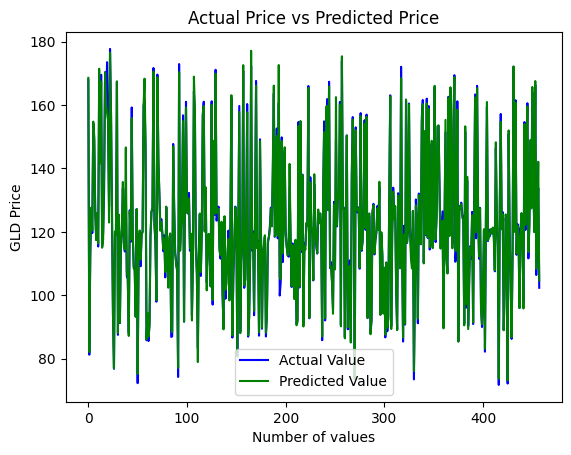

In [38]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()